In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

import kagglehub

# Download latest version
df = pd.read_csv('imdb_movies.csv')
df = df.dropna() 

In [2]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [3]:
df['budget_x']

0         75000000.0
1        460000000.0
2        100000000.0
3         12300000.0
4         77000000.0
            ...     
10173      7000000.0
10174      9145817.8
10175     21800000.0
10176    116000000.0
10177     92400000.0
Name: budget_x, Length: 10052, dtype: float64

In [4]:
df['score']

0        73.0
1        78.0
2        76.0
3        70.0
4        61.0
         ... 
10173    73.0
10174    54.0
10175    61.0
10176    55.0
10177    70.0
Name: score, Length: 10052, dtype: float64

Text(0.5, 1.0, 'Budget Distribution Plot')

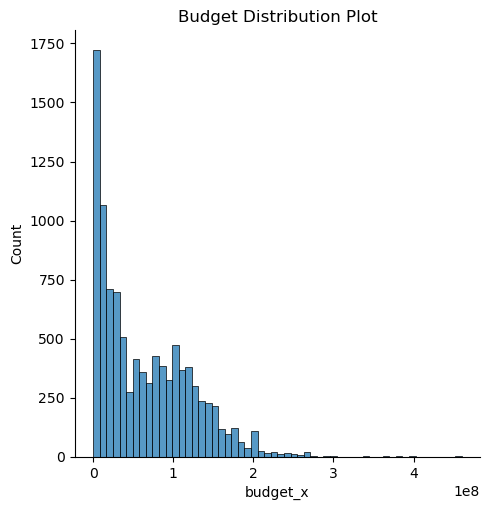

In [5]:
sns.displot(df['budget_x'])
plt.title('Budget Distribution Plot')

In [6]:
df['date_x'] = df['date_x'].str.strip()

In [7]:
df['date_x'] = pd.to_datetime(df['date_x'], format='%m/%d/%Y')

In [8]:
df['year'] = df['date_x'].dt.year

In [9]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


In [10]:
df = df.dropna(subset=['revenue', 'budget_x', 'score']) 

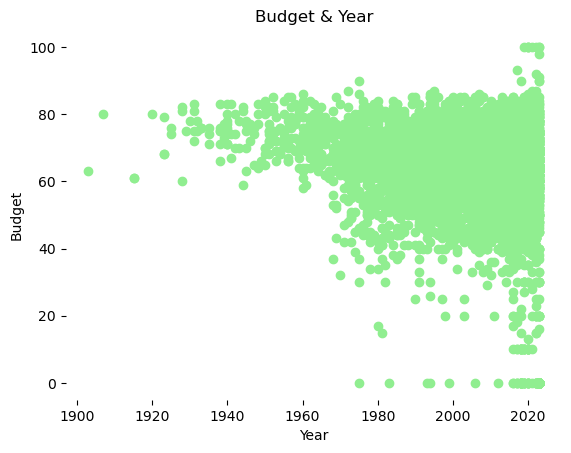

In [11]:
plt.scatter(df['year'], df['score'], color='lightgreen')
plt.title('Budget & Year')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.box(False)
plt.show()

In [12]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


In [13]:
X = df[['budget_x', 'score', 'country', 'status', 'orig_lang','names','year']]
y = df['revenue']

In [14]:
categorical_features = ['country', 'status', 'orig_lang','names']
numerical_features = ['budget_x', 'score', 'year']

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
    ]
)

ColumnTransformer(transformers=[('num', 'passthrough', ['budget_x', 'score']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['country', 'status', 'orig_lang'])])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
#predictions
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [20]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (8041, 7781)
y_train shape: (8041,)


In [21]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 3.876091146589016e+16


In [22]:
print(df['country'].unique())  

['AU' 'US' 'MX' 'GB' 'CL' 'NO' 'ES' 'AR' 'KR' 'HK' 'UA' 'IT' 'RU' 'CO'
 'DE' 'JP' 'FR' 'FI' 'IS' 'ID' 'BR' 'BE' 'DK' 'TR' 'TH' 'PL' 'GT' 'CN'
 'CZ' 'PH' 'ZA' 'CA' 'NL' 'TW' 'PR' 'IN' 'IE' 'SG' 'PE' 'CH' 'SE' 'IL'
 'DO' 'VN' 'GR' 'SU' 'HU' 'BO' 'SK' 'UY' 'AT' 'PY' 'MY' 'MU' 'XC' 'PT'
 'IR']


In [23]:
mse = mean_squared_error(y_test, y_pred)

In [24]:
r2 = r2_score(y_test, y_pred)

In [25]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
regressor.fit(X_train_poly, y_train)

LinearRegression()

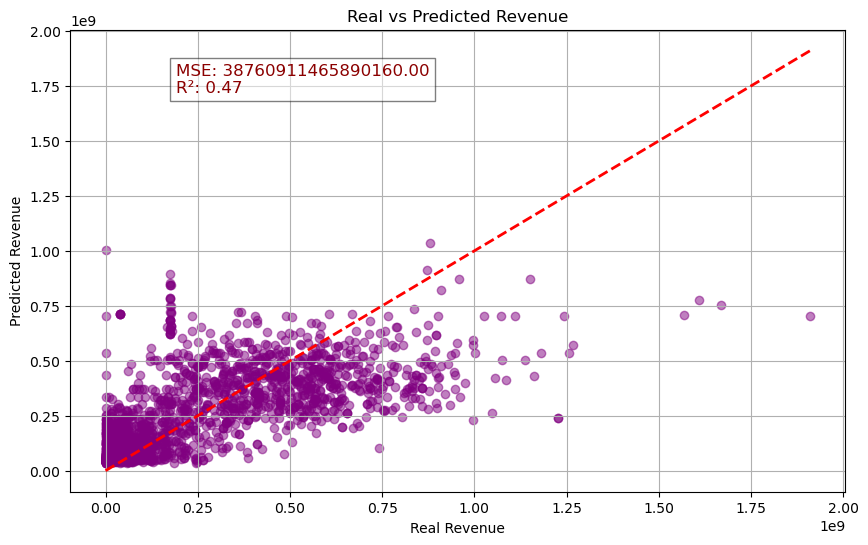

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Real vs Predicted Revenue')
plt.xlabel('Real Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.text(
    0.1 * y_test.max(), 0.9 * y_test.max(), 
    f"MSE: {mse:.2f}\nR²: {r2:.2f}", 
    fontsize=12, color='darkred', bbox=dict(facecolor='white', alpha=0.5)
)
plt.show()

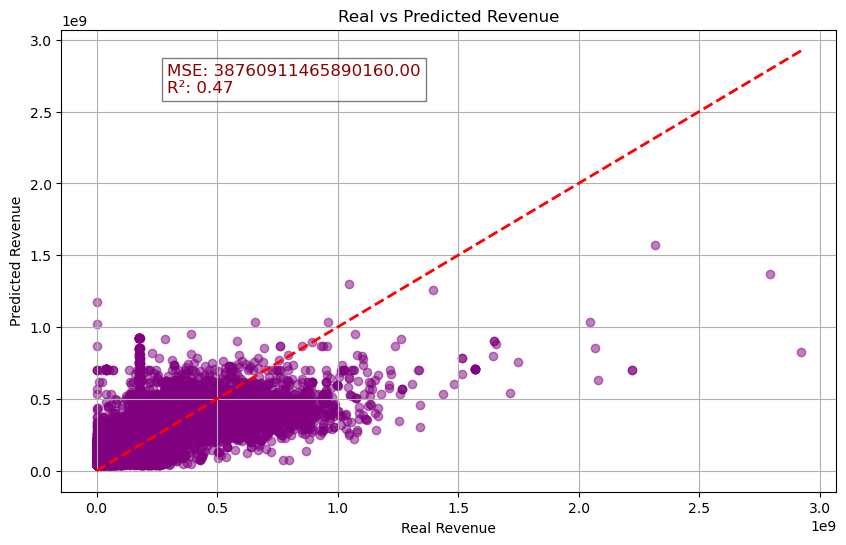

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='purple', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Real vs Predicted Revenue')
plt.xlabel('Real Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.text(
    0.1 * y_train.max(), 0.9 * y_train.max(), 
    f"MSE: {mse:.2f}\nR²: {r2:.2f}", 
    fontsize=12, color='darkred', bbox=dict(facecolor='white', alpha=0.5)
)
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"(MSE): {-cv_scores.mean():.2f}")

(MSE): 41383347766151608.00
